# HW 1
## Machine Learning with Python IDS-594 
### Due date: 6:00 pm 09/20/2019

In this homework you will do a classification task. You will build a model that predicts whether a person has heart disease or not. While doing this homework you will learn: <br> 1) how to pre-process the data <br> 2) perform model selection (which algorithm should you use for building your model, logistic regression or k-nearest neighbor?)  <br>3) perform hyperparameter selection (what value of K should you use in you k-nearest neighbor algorithm) <br>After you selected the best model via cross validation, you will apply your model to the test set and report your performance to me.

Refer to Python's documentation for each function to see the input arguments, outputs, and methods.

The inputs of this homework are heart_disease.xlsx which contains the data, and heart.doc which contains some information regarding each feature (columns in the heart_disease.xlsx file)

##### Fill in the cells that have "TO DO", and give me your output scores and answer any questions I asked in the problems in a report.

In [99]:
# Import the important packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

### Problem 1) Cleaning data and visualization

In [100]:
# Use pandas.read_excel to read the heart_disease.xlsx file into a dataframe called data
data = pd.read_excel('heart_disease.xlsx')

In [101]:
# Look at the first 5 rows by using head(5)
data.head(5)

,age,sex,chest_pain,bp,chol,blood_sugar,ecg,heart_rate,angia,oldpeak,slope,vessel_num,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [102]:
# Get the statistics of your dataframe
data.describe()

,age,sex,chest_pain,bp,chol,blood_sugar,ecg,heart_rate,angia,oldpeak,slope,vessel_num,thal,heart_disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [103]:
# Are there any columns that contain a missing value? If yes, substitute those with the mean value of each column!
data.isnull().any()

#None of the columns contain missing values.

age              False
sex              False
chest_pain       False
bp               False
chol             False
blood_sugar      False
ecg              False
heart_rate       False
angia            False
oldpeak          False
slope            False
vessel_num       False
thal             False
heart_disease    False
dtype: bool

Text(0, 0.5, 'frequency of disease')

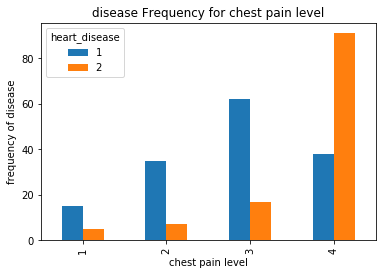

In [104]:
# Look at the disease Frequency for chest pain level (do this for other categorical variables to see if they are useful features)
%matplotlib inline
pd.crosstab(data.chest_pain,data.heart_disease).plot(kind='bar')
plt.title('disease Frequency for chest pain level')
plt.xlabel('chest pain level')
plt.ylabel('frequency of disease')

Text(0, 0.5, 'frequency of disease')

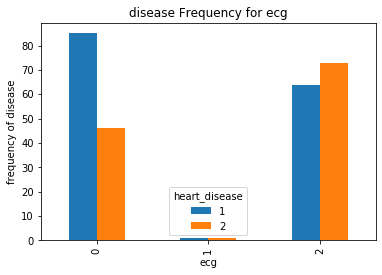

In [105]:
%matplotlib inline
pd.crosstab(data.ecg,data.heart_disease).plot(kind='bar')
plt.title('disease Frequency for ecg')
plt.xlabel('ecg')
plt.ylabel('frequency of disease')

Text(0, 0.5, 'frequency of disease')

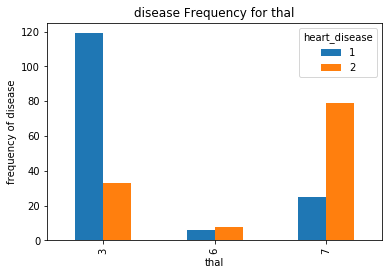

In [106]:
%matplotlib inline
pd.crosstab(data.thal,data.heart_disease).plot(kind='bar')
plt.title('disease Frequency for thal')
plt.xlabel('thal')
plt.ylabel('frequency of disease')

In [107]:
# Use pandas.get_dummies and put the column names for the categorical variables (refer to the documentation to find which columns are categorical variables). This will create a dummy variable for each level of categories.

data = pd.get_dummies(data , columns = ['ecg','chest_pain','thal'])

In [108]:
# What is number of classes disease/not_disease?
data['heart_disease'].value_counts()
# Absence of heart disease - 150
# Presence of heart disease - 120

1    150
2    120
Name: heart_disease, dtype: int64

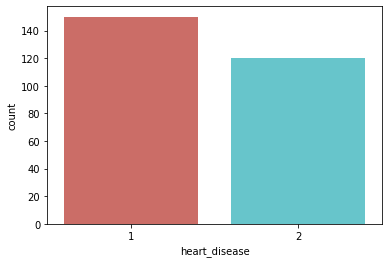

In [109]:
import seaborn as sns
sns.countplot(x='heart_disease', data=data, palette='hls')
plt.show()

In [110]:
# Get your class labels in a variable called y, and remove it from your dataframe . Now, data contains your samples and features, and y contains your labels
y = data['heart_disease']
data.drop('heart_disease', axis=1, inplace=True)

In [111]:
# Split the data into a train and validation set. You won't touch the test set until the very end of this program. 
# Perform any analysis (model selection, hyperparameter selection) on your training data (X_train_outer)
# DO NOT TOUCH X_test UNTIL THE END OF THIS PROGRAM!!!!
X_train_outer, X_test, y_train_outer, y_test = train_test_split(data, y, test_size=0.2,random_state = 23)
print (X_train_outer.shape, y_train_outer.shape)
print (X_test.shape, y_test.shape)

(216, 20) (216,)
(54, 20) (54,)


### Problem 2) Classification using nearest neighbor classifier, and see overfitting and underfitting by changing the value of n_neighbors (vary it from 1 to the number of samples -- len(X_train_inner)) What is the accuracy on training and validation when k=1? What about k=len(X_train_inner) ? When underfitting happens when overfitting?

In [112]:
# Split X_train_outer again into X_train_inner, X_val, y_train_inner, y_val (We have an inner training set, and the validation set)
X_train_inner, X_val, y_train_inner, y_val = train_test_split(X_train_outer, y_train_outer, test_size=0.2,random_state = 23)
print (X_train_inner.shape, y_train_inner.shape)
print (X_val.shape, y_val.shape)

(172, 20) (172,)
(44, 20) (44,)


In [113]:
# Standardize the training set, and then apply the transformation values to the val set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_inner)
X_train_inner_std = scaler.transform(X_train_inner)
X_val_std  = scaler.transform(X_val)

In [114]:
# Fit a K-nearest neighbor classifier model to X_train_inner_std data --> Change the value of n_neighbors here and report the accuracies you get
K_values = np.arange(0,len(X_train_inner))

accuracy_training = np.array([])
accuracy_validation = np.array([])

for k in range(len(K_values)):
    neigh = KNeighborsClassifier(n_neighbors=k+1)
    neigh.fit(X_train_inner_std, y_train_inner)
    
    X_train_inner_std_pred = neigh.predict(X_train_inner_std)
    acc_train = accuracy_score(y_train_inner, X_train_inner_std_pred)
    accuracy_training = np.append(accuracy_training,acc_train)
    print('Accuracy on training data for K= {} is : {}'.format(k+1,acc_train))
    
    X_val_std_pred = neigh.predict(X_val_std)
    acc_val = accuracy_score(y_val, X_val_std_pred)
    accuracy_validation = np.append(accuracy_validation,acc_val)
    print('Accuracy on validation data for K= {} is : {}'.format(k+1,acc_val))

Accuracy on training data for K= 1 is : 1.0
Accuracy on validation data for K= 1 is : 0.6136363636363636
Accuracy on training data for K= 2 is : 0.872093023255814
Accuracy on validation data for K= 2 is : 0.6818181818181818
Accuracy on training data for K= 3 is : 0.8837209302325582
Accuracy on validation data for K= 3 is : 0.7045454545454546
Accuracy on training data for K= 4 is : 0.872093023255814
Accuracy on validation data for K= 4 is : 0.7045454545454546
Accuracy on training data for K= 5 is : 0.877906976744186
Accuracy on validation data for K= 5 is : 0.7272727272727273
Accuracy on training data for K= 6 is : 0.877906976744186
Accuracy on validation data for K= 6 is : 0.7272727272727273
Accuracy on training data for K= 7 is : 0.8895348837209303
Accuracy on validation data for K= 7 is : 0.7045454545454546
Accuracy on training data for K= 8 is : 0.8895348837209303
Accuracy on validation data for K= 8 is : 0.7045454545454546
Accuracy on training data for K= 9 is : 0.8953488372093024


Accuracy on training data for K= 73 is : 0.872093023255814
Accuracy on validation data for K= 73 is : 0.7954545454545454
Accuracy on training data for K= 74 is : 0.877906976744186
Accuracy on validation data for K= 74 is : 0.7954545454545454
Accuracy on training data for K= 75 is : 0.872093023255814
Accuracy on validation data for K= 75 is : 0.7954545454545454
Accuracy on training data for K= 76 is : 0.872093023255814
Accuracy on validation data for K= 76 is : 0.7954545454545454
Accuracy on training data for K= 77 is : 0.877906976744186
Accuracy on validation data for K= 77 is : 0.7954545454545454
Accuracy on training data for K= 78 is : 0.877906976744186
Accuracy on validation data for K= 78 is : 0.7954545454545454
Accuracy on training data for K= 79 is : 0.877906976744186
Accuracy on validation data for K= 79 is : 0.7954545454545454
Accuracy on training data for K= 80 is : 0.8837209302325582
Accuracy on validation data for K= 80 is : 0.7954545454545454
Accuracy on training data for K

Accuracy on validation data for K= 142 is : 0.7045454545454546
Accuracy on training data for K= 143 is : 0.686046511627907
Accuracy on validation data for K= 143 is : 0.7045454545454546
Accuracy on training data for K= 144 is : 0.6511627906976745
Accuracy on validation data for K= 144 is : 0.6818181818181818
Accuracy on training data for K= 145 is : 0.6627906976744186
Accuracy on validation data for K= 145 is : 0.7045454545454546
Accuracy on training data for K= 146 is : 0.6337209302325582
Accuracy on validation data for K= 146 is : 0.6818181818181818
Accuracy on training data for K= 147 is : 0.6337209302325582
Accuracy on validation data for K= 147 is : 0.6818181818181818
Accuracy on training data for K= 148 is : 0.5930232558139535
Accuracy on validation data for K= 148 is : 0.6590909090909091
Accuracy on training data for K= 149 is : 0.5988372093023255
Accuracy on validation data for K= 149 is : 0.6590909090909091
Accuracy on training data for K= 150 is : 0.5581395348837209
Accuracy 

In [115]:
# Print accuracy on your validation data (X_val_std)
print('Accuracy on validation data is : {}'.format(accuracy_validation))

Accuracy on validation data is : [0.61363636 0.68181818 0.70454545 0.70454545 0.72727273 0.72727273
 0.70454545 0.70454545 0.72727273 0.72727273 0.70454545 0.75
 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273
 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273
 0.72727273 0.72727273 0.72727273 0.75       0.72727273 0.72727273
 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273
 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273 0.72727273
 0.72727273 0.72727273 0.72727273 0.75       0.75       0.77272727
 0.75       0.75       0.75       0.77272727 0.77272727 0.77272727
 0.75       0.77272727 0.75       0.77272727 0.77272727 0.77272727
 0.77272727 0.77272727 0.77272727 0.77272727 0.77272727 0.77272727
 0.77272727 0.77272727 0.77272727 0.77272727 0.77272727 0.79545455
 0.79545455 0.79545455 0.79545455 0.79545455 0.79545455 0.79545455
 0.79545455 0.79545455 0.79545455 0.79545455 0.79545455 0.81818182
 0.79545455 0.81818182 0.79545455 0

In [116]:
# Print accuracy on your training data (X_train_inner_std)
print('Accuracy on training data is : {}'.format(accuracy_training))

Accuracy on training data is : [1.         0.87209302 0.88372093 0.87209302 0.87790698 0.87790698
 0.88953488 0.88953488 0.89534884 0.88953488 0.88953488 0.87209302
 0.88953488 0.88953488 0.88953488 0.88372093 0.88953488 0.88372093
 0.88953488 0.88372093 0.89534884 0.90116279 0.89534884 0.88372093
 0.88372093 0.88953488 0.88372093 0.88953488 0.89534884 0.88953488
 0.89534884 0.90116279 0.88953488 0.88953488 0.89534884 0.89534884
 0.89534884 0.89534884 0.88953488 0.88953488 0.88953488 0.88372093
 0.88372093 0.88372093 0.88953488 0.88953488 0.88372093 0.88372093
 0.88372093 0.87790698 0.87790698 0.88372093 0.88372093 0.88953488
 0.88953488 0.87790698 0.88372093 0.87790698 0.87209302 0.87790698
 0.87209302 0.86627907 0.86627907 0.86627907 0.86627907 0.86627907
 0.87209302 0.87790698 0.87209302 0.87209302 0.87209302 0.87790698
 0.87209302 0.87790698 0.87209302 0.87209302 0.87790698 0.87790698
 0.87790698 0.88372093 0.88372093 0.88953488 0.88953488 0.88953488
 0.88953488 0.87209302 0.877906

### Problem 3) So, how to find best k? Perform 10-fold Cross-validation on your train set to find the best value of k for nearest neighbor classifier (you can also find it by trying different values on the hold-out set you defined above, but since the dataset is small, it is better to perform 10-fold cross-validation, why? because you may by chance get a hold-out validation set that works well with k=1! you never know! So, do it on 10 different val sets and average them to make sure you got a good k!

In [117]:
# In each fold of your cross validation, your training fold needs to be first standardized (scaled), then an algorithm be fit
# Then the same transformation will be applied to each validation fold
# This is done by pipeline and is extremely useful when you use GridSearchCV or cross_val_score and etc..
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
clf = KNeighborsClassifier()
pipeline = Pipeline([('transformer', scaler), ('estimator', clf)])

In [118]:
# param_candidate defines the set of hyperparameters that you want your function to analyze
from sklearn.model_selection import GridSearchCV
param_candidate = [{'estimator__n_neighbors': np.arange(1, 100)}]

In [119]:
# Create a classifier object with GridSearchCV and param_candidate and fit the GridSearchCV object with X_train_outer, and y_train_outer 
# Read Python's documentation if anything is unclear!
clf = GridSearchCV(pipeline, param_grid=param_candidate, cv=10)
clf.fit(X_train_outer,y_train_outer)

C:\Users\prath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('transformer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('estimator',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                               

In [120]:
# print clf.best_score_ (refer to Python's documentation for the attributes of clf)
print('Best score for data1:', clf.best_score_) 

Best score for data1: 0.8611111111111112


In [121]:
# View the best parameters for the model found using grid search
print('Best k:',clf.best_params_) 

Best k: {'estimator__n_neighbors': 28}


### Problem 4) Perform logistic regression with the default value of C=1, and obtain the cross-validation performance

In [122]:
# Do standardization before classification using Pipeline as Problem 3. You don't need any param_candidate in this case.
pipeline1 = Pipeline([('transformer', StandardScaler()), ('estimator', LogisticRegression(multi_class="ovr",C=1.0))])

In [123]:
# Use the cross_val_score on logistic regression on X_train_outer and y_train_outer with cv=10 and get scores
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline1,X_train_outer,y_train_outer,cv=10)

C:\Users\prath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [124]:
scores.mean()

0.8516374929418408

### Problem 5) Cross-validation performance of which algorithm was better? K-nearest neighbor or logistic regression? You will pick the one that gave you the highest performance (accuracy), and train your model using all training data, test it on your test set (which you never touched up until this point), get your performance, and report it (to me, to the doctor, or the hospital as the generalization performance of your model)

In [125]:
# Standardize the training set (X_train_outer), and then apply the transformation values to the test set (X_test)
# TO DO
scaler = StandardScaler().fit(X_train_outer)
X_train_outer_std = scaler.transform(X_train_outer)
X_test_std = scaler.transform(X_test)

In [126]:
# Fit the best algorithm to X_train_outer_std, y_train_outer
clf = KNeighborsClassifier(n_neighbors=28)
clf.fit(X_train_outer_std, y_train_outer)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

In [127]:
# Test on your test set X_test_std, and report accuracy_score
X_test_std_pred = clf.predict(X_test_std)
accuracy_score(X_test_std_pred,y_test)

0.8148148148148148